<a href="https://colab.research.google.com/github/jose-marquez89/DS-Unit-1-Sprint-2-Statistics/blob/master/module1/LS_DS_121_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind

In [2]:
# Get the data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-12-09 17:50:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.07s   

2019-12-09 17:50:16 (271 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [5]:
# Load Data
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party', 'handicapped-infants', 'water-project',
                        'budget', 'physician-fee-freeze', 'el-salvador-aid',
                        'religious-groups', 'anti-satellite-ban', 
                        'aid-to-contras', 'mx-missile', 'immigration',
                        'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free',
                        'south-africa'])
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [7]:
# Replace question marks and yes/no values
df = df.replace({'?':np.NaN, 'n': 0, 'y':1})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [8]:
# separate the data into democrat and republican

# republicans
rep = df[df['party'] == "republican"]
print(rep.shape)
rep.head()

(168, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [11]:
# democrats
dem = df[df['party'] == 'democrat']
print(dem.shape)
dem.head()

(267, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [46]:
# find an issue that democrats support more than republicans with p < 0.01

# budget
ttest_ind(dem['budget'], rep['budget'], nan_policy='omit') 

# large statistic, p < 0.01, dems support the budget legislation more than reps

Ttest_indResult(statistic=23.21277691701378, pvalue=2.0703402795404463e-77)

In [50]:
# find an issue that republicans support more than democrats with p < 0.01

# crime
ttest_ind(rep['crime'], dem['crime'], nan_policy='omit')

# large statistic, p < 0.01, reps support the crime legislation more than dems

Ttest_indResult(statistic=16.342085656197696, pvalue=9.952342705606092e-47)

In [59]:
# find an issue where there is not a large difference between the two parties

# water-project
ttest_ind(dem['water-project'], rep['water-project'], nan_policy='omit')

# statistic is close to 0, and p > 0.1

Ttest_indResult(statistic=-0.08896538137868286, pvalue=0.9291556823993485)

In [80]:
# =======STRETCH GOALS=======

# refactor code into functions

# prints ttest result without typing out entire code
def tInd(a, b, column):  
  result = ttest_ind(a[column], 
                     b[column], 
                     nan_policy='omit')
  outputString = "s: %f\np: %e" % (result[0], result[1])
  print(outputString)

tInd(dem, rep, 'south-africa')  

s: 6.849455
p: 3.652674e-11


In [82]:
# hypothesis testing on personal project data
from google.colab import files
uploaded = files.upload()

Saving zero.csv to zero.csv


In [149]:
# zero (fasting app on iOS) data since 5/19
zero = pd.read_csv('zero.csv')
print(zero.shape)
zero.head()

(89, 5)


,Date,Start,End,Hours,Night Eating
0,12/8/19,19:54,3,NaN,NaN
1,12/6/19,19:21,09:26,14.0,2.0
2,12/5/19,19:30,08:30,13.0,2.0
3,12/3/19,19:12,07:20,12.0,2.0
4,12/1/19,18:00,07:00,13.0,1.0


In [150]:
# clean data
# print(zero.isnull().sum())

# needed to see all rows
pd.set_option('display.max_rows', 100)

# filling NaN values
zero['Night Eating'].fillna(zero['Night Eating'].median(), inplace=True)
zero['Hours'].fillna(method='bfill', inplace=True)

zero.isnull().sum()

Date            0
Start           0
End             0
Hours           0
Night Eating    0
dtype: int64

In [153]:
# cleaning up an unexplained rogue value
zero['End'].loc[0] = '09:54'
zero.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Date,Start,End,Hours,Night Eating
0,12/8/19,19:54,09:54,14.0,0.0
1,12/6/19,19:21,09:26,14.0,2.0
2,12/5/19,19:30,08:30,13.0,2.0
3,12/3/19,19:12,07:20,12.0,2.0
4,12/1/19,18:00,07:00,13.0,1.0


In [0]:
# converting objects to datetime
zero['Start'] = pd.to_datetime(zero['Start'], format="%H:%M").dt.time
zero['End'] = pd.to_datetime(zero['End'], format="%H:%M").dt.time
zero['Date'] = pd.to_datetime(zero['Date'])

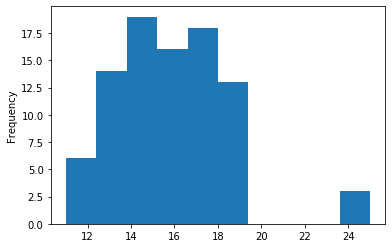

In [173]:
# checking out distribution
zero['Hours'].plot.hist()

In [175]:
'''HYPOTHESIS: The majority of my fasts were not 12hr fasts
   NULL HYPOTHESIS: The majority of fasts were 12hr fasts'''

ttest_1samp(zero['Hours'], 12)

'''Based on the large statistic, I would reject the hypothesis
   that most of my fasts were 12hr fasts, and since the p-value
   is very small, I can say this with a high degree of confidence.'''

Ttest_1sampResult(statistic=13.761036724762704, pvalue=1.1803539886859433e-23)